#### Dự báo nhiệt độ của quá trình hoá học

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

In [3]:
# Tải dữ liệu nhiệt độ
temp = pd.read_excel('../Data/chemical process.xlsx')
temp.head()

,Temperature readings
0,26.6
1,27.0
2,27.1
3,27.1
4,27.1


In [4]:
model = ARIMA(temp, order=(1,1,0))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     Temperature readings   No. Observations:                  226
Model:                   ARIMA(1, 1, 0)   Log Likelihood                 131.668
Date:                  Thu, 14 Dec 2023   AIC                           -259.336
Time:                          23:09:56   BIC                           -252.504
Sample:                               0   HQIC                          -256.579
                                  - 226                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8202      0.024     34.658      0.000       0.774       0.867
sigma2         0.0181      0.001     19.381      0.000       0.016       0.020
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               233.10
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                             0.59
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [5]:
# Dự báo cho 30 khoảng thời gian tiếp theo
fc = result.get_forecast(30, alpha=0.05)
fc.summary_frame().head()

Temperature readings,mean,mean_se,mean_ci_lower,mean_ci_upper
226,18.635969,0.134439,18.372473,18.899464
227,18.501438,0.279198,17.954219,19.048657
228,18.391102,0.436193,17.536179,19.246024
229,18.300609,0.598155,17.128246,19.472971
230,18.226390,0.760795,16.735260,19.717521


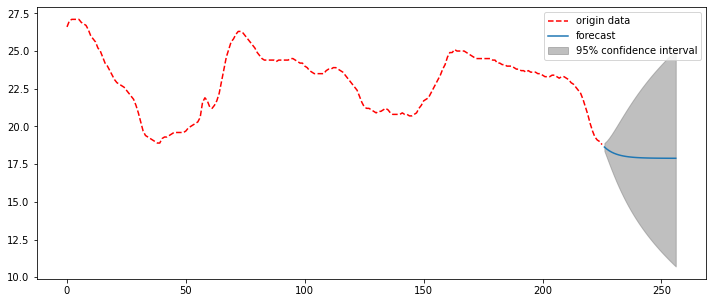

In [6]:
# Đồ thị giá trị dự báo
from statsmodels.graphics.tsaplots import plot_predict

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(temp[0:],'--',color='red', label = 'origin data')
fig = plot_predict(result, start = len(temp),end = len(temp)+30, ax=ax)